# Practice 3 - Data Visualization

>Trabajo indivudal realizado por la alumna **Bianca K. Mansilla Costa**

>Profesor: **Héctor Chocobar**

>*Lic. Datos y Negocios - Programación 2do Semestre*

# Indicaciones
Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.


Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.

Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.


Considera problemas como leyendas, etiquetas y líneas en demasía.

> **Nota:** Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

A continuación se presenta una tabla y se exporta los datos del archivo en el cual vamos a trabajar.

In [2]:
import pandas as pd

file_path = '/content/sample_data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
df = pd.read_csv(file_path)

df.head(10)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
5,USW00014833,2010-10-01,TMAX,194
6,USC00207308,2010-06-29,TMIN,144
7,USC00203712,2005-10-04,TMAX,289
8,USW00004848,2007-12-14,TMIN,-16
9,USC00200220,2011-04-21,TMAX,72


Se filtra los datos y las fechas necesarias (del 2005 al 2014). También, elimino el 29 de febrero como lo solicita la consigna. Para una mejor apreciación, se ordena las fechas:


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

df_filtered = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]

df_max_min = df_filtered[df_filtered['Element'].isin(['TMAX', 'TMIN'])]

df_max_min['Date'] = df_max_min['Date'].dt.strftime('%m-%d')

df_max_min = df_max_min[df_max_min['Date'] != '02-29']

df_max_min_pivot = df_max_min.pivot_table(index='Date',
                                          columns='Element',
                                          values='Data_Value',
                                          aggfunc='max')
df_max_min_pivot.rename(columns={'TMAX': 'max_temp', 'TMIN': 'min_temp'}, inplace=True)

df_max_min_pivot.sort_index(inplace=True)

df_max_min_pivot.head(10)

Element,max_temp,min_temp
Date,,
01-01,156,72
01-02,139,28
01-03,133,28
01-04,106,44
01-05,128,94
01-06,189,78
01-07,217,139
01-08,194,117
01-09,178,50


El siguiente paso es convertir las temperaturas de Fahrenheit a Celsius, ya que nos resulta mejor a nosotros la visualización en grados Celsius:



In [4]:
df_max_min_pivot['max_temp'] = round((df_max_min_pivot['max_temp'] - 32) * 5 / 9, 2)
df_max_min_pivot['min_temp'] = round((df_max_min_pivot['min_temp'] - 32) * 5 / 9, 2)

df_max_min_pivot.head(10)

Element,max_temp,min_temp
Date,,
01-01,68.89,22.22
01-02,59.44,-2.22
01-03,56.11,-2.22
01-04,41.11,6.67
01-05,53.33,34.44
01-06,87.22,25.56
01-07,102.78,59.44
01-08,90.00,47.22
01-09,81.11,10.00


Realizo una tabla aparte para filtrar los datos únicamente del año 2015:
> Nota: aparecerá un aviso para evitar un error en el futuro con el archivo en la parte "Date".

In [7]:
df_2015_pivot = df_2015_pivot[(df_2015_pivot['max_temp'] >= -50) & (df_2015_pivot['max_temp'] <= 50)]
df_2015_pivot = df_2015_pivot[(df_2015_pivot['min_temp'] >= -50) & (df_2015_pivot['min_temp'] <= 50)]

df_2015 = df[(df['Date'].dt.year == 2015) & (df['Element'].isin(['TMAX', 'TMIN']))]

df_2015.loc[:, 'Date'] = pd.to_datetime(df_2015['Date']).dt.strftime('%m-%d')

df_2015_pivot = df_2015.pivot_table(index='Date',
                                     columns='Element',
                                     values='Data_Value',
                                     aggfunc='max')
df_2015_pivot.rename(columns={'TMAX': 'max_temp', 'TMIN': 'min_temp'}, inplace=True)

df_2015_pivot['max_temp'] = round((df_2015_pivot['max_temp'] - 32) * 5 / 9, 2)
df_2015_pivot['min_temp'] = round((df_2015_pivot['min_temp'] - 32) * 5 / 9, 2)

days_above_max_record = df_2015_pivot[df_2015_pivot['max_temp'] > df_max_min_pivot['max_temp']]
days_above_min_record = df_2015_pivot[df_2015_pivot['min_temp'] < df_max_min_pivot['min_temp']]

df_max_min_pivot.head(10)

<ipython-input-7-eb14dcc547ca>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['01-03' '03-17' '06-06' ... '06-23' '11-14' '06-09']' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_2015.loc[:, 'Date'] = pd.to_datetime(df_2015['Date']).dt.strftime('%m-%d')


Element,max_temp,min_temp
Date,,
01-01,68.89,22.22
01-02,59.44,-2.22
01-03,56.11,-2.22
01-04,41.11,6.67
01-05,53.33,34.44
01-06,87.22,25.56
01-07,102.78,59.44
01-08,90.00,47.22
01-09,81.11,10.00


Filtro de las temperaturas máximas (> 50°C):

In [9]:
days_above_max_record = days_above_max_record[days_above_max_record['max_temp'] <= 50]

print("Días con temperaturas máximas por encima del récord histórico (con valores depurados):")
print(days_above_max_record)

Días con temperaturas máximas por encima del récord histórico (con valores depurados):
Element  max_temp  min_temp
Date                       
02-09       28.33    -23.89
12-07       37.78    -23.89
12-08       37.78     -5.56
12-09       50.00      0.56
12-25       43.89     16.11
12-26       47.22      3.89


Filtro de temperaturas mínimas máximas (hasta -50°C)

In [16]:
days_above_min_record_filtered = days_above_min_record[(days_above_min_record['min_temp'] <= -30) &
                                                      (days_above_min_record['min_temp'] >= -50)]

print("Días con temperaturas mínimas entre -30°C y -50°C:")
print(days_above_min_record_filtered)

Días con temperaturas mínimas entre -30°C y -50°C (extremos pero razonables):
Element  max_temp  min_temp
Date                       
01-02        3.89    -33.33
01-03        3.89    -33.33
01-12      -14.44    -39.44
01-16      -14.44    -45.56
01-21       -5.56    -35.56
01-22      -20.56    -41.67
01-24        6.67    -35.56
01-25        0.56    -33.33
02-01        3.89    -48.89
02-04      -11.67    -48.89
02-07       13.33    -45.00
03-03        6.67    -41.67
03-04        0.56    -39.44
03-18       47.22    -32.78
03-22       47.22    -36.11
03-23       43.89    -45.56
03-27       53.33    -42.22
03-29       31.67    -48.89
11-22       -5.56    -39.44
12-19      -11.67    -33.33
12-20       28.33    -42.22


Se realiza el gráfico correspondiente a la tarea, en el cual se observa:

*   Primer día de cada mes (excepto 31/12).
*   Temperaturas máximas y mínimas 2004-2014.
*   Sombreado del área mencionada en verde claro.
*   Puntos de dispersión representando los datos atípicos 2015.
*   Fuente de información.

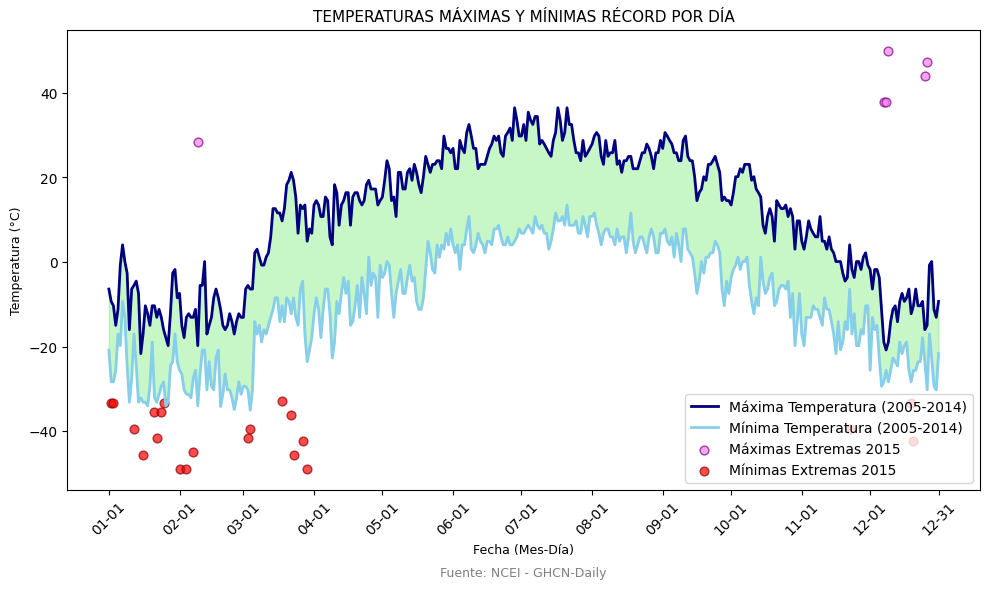

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

df_max_min_pivot['max_temp'] = round((df_max_min_pivot['max_temp'] - 32) * 5 / 9, 2)
df_max_min_pivot['min_temp'] = round((df_max_min_pivot['min_temp'] - 32) * 5 / 9, 2)

days_above_max_record = days_above_max_record[days_above_max_record['max_temp'] <= 50]

days_above_min_record_filtered = days_above_min_record[(days_above_min_record['min_temp'] <= -30) &
                                                      (days_above_min_record['min_temp'] >= -50)]

fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(df_max_min_pivot.index, df_max_min_pivot['max_temp'], label='Máxima Temperatura (2005-2014)', color='navy', lw=2)
plt.plot(df_max_min_pivot.index, df_max_min_pivot['min_temp'], label='Mínima Temperatura (2005-2014)', color='skyblue', lw=2)

plt.fill_between(df_max_min_pivot.index, df_max_min_pivot['max_temp'], df_max_min_pivot['min_temp'], color='lightgreen', alpha=0.5)

plt.scatter(days_above_max_record.index, days_above_max_record['max_temp'], color='violet', label='Máximas Extremas 2015', s=40, edgecolors='purple', alpha=0.7)

plt.scatter(days_above_min_record_filtered.index, days_above_min_record_filtered['min_temp'], color='red', label='Mínimas Extremas 2015', s=40, edgecolors='darkred', alpha=0.7)

plt.title('TEMPERATURAS MÁXIMAS Y MÍNIMAS RÉCORD POR DÍA', fontsize=11)
plt.xlabel('Fecha (Mes-Día)', fontsize=9)
plt.ylabel('Temperatura (°C)', fontsize=9)

first_days = df_max_min_pivot.index[df_max_min_pivot.index.str.endswith('01')]
last_december_day = '12-31'
xticks = list(first_days) + [last_december_day]
xtick_labels = xticks
plt.xticks(xticks, labels=xtick_labels, rotation=45)

plt.legend(loc='lower right')
plt.text(0.5, -0.18, 'Fuente: NCEI - GHCN-Daily', ha='center', va='center', fontsize=9, color='gray', transform=ax.transAxes)

plt.tight_layout()
plt.show()


# Análisis de lo observado

Podemos apreciar en rojo oscuro vía cículos todas las temperaturas mínimas atípicas en el año 2015 respecto al período 2004-2014. Por otro lado, se observa en menor cantidad los datos de temperaturas máximas atípicas (fuera del promedio) en color lila/violeta.

Se tiene en cuenta un rango de temperaturas.

Al estar en Uruguay, estos datos pueden sorprendernos, ya que sus temperaturas máximas y mínimas son bastante extremas. Además, observamos que las estaciones están invertidas en comparación con las nuestras.